In [1]:
# validation_curve 함수로 최적의 은닉 노드 개수 찾기 [프로그램 4-5]
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, validation_curve
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# read dataset and split into train and test
digit = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split(
    digit.data, digit.target, train_size=0.6)

In [3]:
# 다층 퍼셉트론을 교차 검증으로 성능 평가 (소요 시간 측정 포함)
start = time.time() # start time
mlp = MLPClassifier(learning_rate=0.001, batch_size=32, max_iter=300, solver='sgd')
# 은닉 노드 개수를 50부터 1000까지 50씩 증가시키면서 성능 평가
# 시간이 너무 오래 걸리지 않도록 50 간격으로 설정. 시간이 충분하다면 range(50, 1001, 1)로 실험
prange = range(50, 1001, 50)
# 
train_score, test_score = validation_curve(
    mlp, x_train, y_train, 
    param_name="hidden_layer_sizes",
    param_range=prange, cv=10,
    scoring="accuracy",
    n_jobs=4
)
end = time.time()
print("하이퍼 매개변수 최적화에 걸린 시간은", end-start, "초입니다.")

하이퍼 매개변수 최적화에 걸린 시간은 2.2575151920318604 초입니다.


In [4]:
# 교차 검증 결과의 평균과 분산 구하기
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)


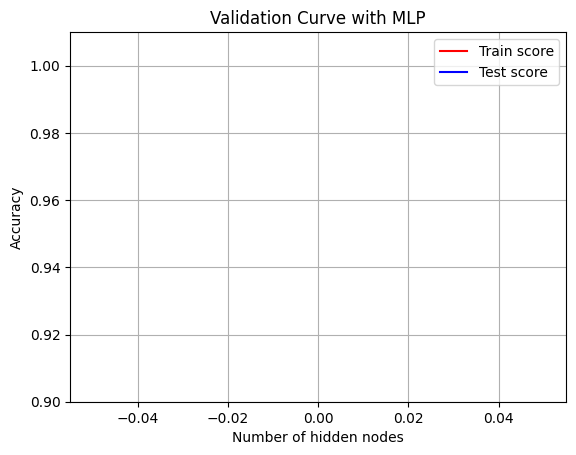


최적의 은닉층의 노드 개수는 50 개입니다.



In [5]:
# 성능 그래프 그리기
plt.plot(prange, train_mean, label="Train score", color="r")
plt.plot(prange, test_mean, label="Test score", color="b")
plt.fill_between(prange, train_mean-train_std, train_mean+train_std, alpha=0.2, color="r")
plt.fill_between(prange, test_mean-test_std, test_mean+test_std, alpha=0.2, color="b")
plt.legend(loc="best")
plt.title("Validation Curve with MLP")
plt.xlabel("Number of hidden nodes"); plt.ylabel("Accuracy")
plt.ylim(0.9, 1.01)
plt.grid(axis='both')
plt.show()

best_number_nodes=prange[np.argmax(test_mean)] # 최적의 은닉 노드 개수
print("\n최적의 은닉층의 노드 개수는", best_number_nodes,"개입니다.\n")

In [6]:
# 최적의 은닉 노드 개수로 모델링
mlp_test = MLPClassifier(hidden_layer_sizes=(best_number_nodes), 
                        learning_rate_init=0.001, 
                        batch_size=32, max_iter=300, solver='sgd')
mlp_test.fit(x_train, y_train)

MLPClassifier(batch_size=32, hidden_layer_sizes=50, max_iter=300, solver='sgd')

In [7]:
# 테스트 집합으로 예측
res = mlp_test.predict(x_test)

In [8]:
# 혼동 행렬
conf = np.zeros((10, 10))
for i in range(len(res)):
    conf[res[i]][y_test[i]] += 1
print(conf)

[[77.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 73.  1.  0.  1.  0.  1.  0.  1.  0.]
 [ 0.  0. 69.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 68.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0. 65.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  1.  0. 71.  1.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0. 77.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0. 66.  0.  2.]
 [ 0.  3.  0.  0.  0.  1.  0.  0. 71.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. 62.]]


In [9]:
# accuracy
no_correct = 0
for i in range(10):
    no_correct += conf[i][i]
accuracy = no_correct/len(res)
print("테스트 집합에 대한 정확률은", accuracy*100, "%입니다.")

테스트 집합에 대한 정확률은 97.2183588317107 %입니다.
